# ML 교재

In [106]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn import datasets

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 11.0
plt.rcParams['axes.unicode_minus'] = False

In [11]:
X = [ [0,0], [0,1], [1,0], [1,1]]
y = [0, 1, 1, 0]
model = SVC()
model.fit(X,y)
print(model.predict(X))
print(model.predict([[1,1]]))
print(model.predict([[1,1],[0,0]]))
print(model.predict([[1,0],[0,1]]))

[0 1 1 0]
[0]
[0 0]
[1 1]


In [12]:
pred = model.predict(X)
accuracy_score(y, pred)

1.0

In [13]:
mean_squared_error(y, pred)

0.0

In [14]:
df = pd.DataFrame([ [0,0,0], [1,0,1], [0,1,1], [1,1,1]])
X = df[[0,1]]
y = df[2]
model = SVC()
model.fit(X,y)
print(model.predict(X))
print(model.predict([[1,1]]))
print(model.predict([[1,1],[0,0]]))
print(model.predict([[1,0],[0,1]]))

[0 1 1 1]
[1]
[1 0]
[1 1]


In [16]:
X

,0,1
0,0,0
1,1,0
2,0,1
3,1,1


In [17]:
y

0    0
1    1
2    1
3    1
Name: 2, dtype: int64

# 34 quiz

In [18]:
xor_data = [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

arr = np.array(xor_data)
arr

array([[0, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 0]])

In [32]:
X = arr[:,:2]
y = arr[:, 2]
model = SVC()
model.fit(X, y)

SVC()

In [40]:
pred = model.predict(X)
print(accuracy_score(y, pred))

1.0


## 36 knn

In [41]:
# 생선의 길이와 무게 => X
bream_length = [
    25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 
    31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 
    35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0
    ]

bream_weight = [
    242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 
    500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
    685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 
    975.0, 950.0
    ]

# 도미 길이 확인
len(bream_length),len(bream_weight)

(35, 35)

In [42]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
len(smelt_length),len(smelt_weight)

(14, 14)

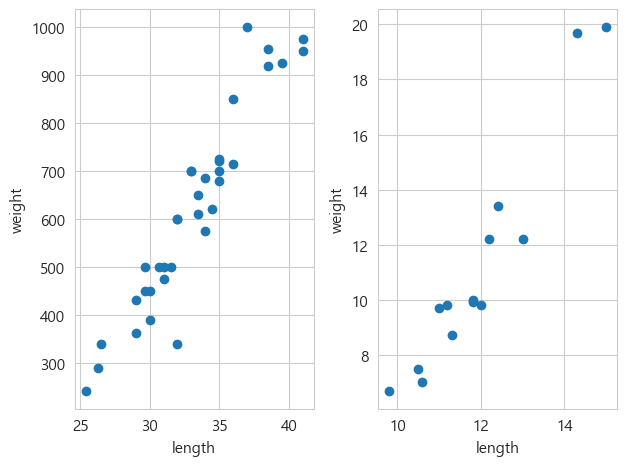

In [50]:
plt.subplot(121)
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.subplot(122)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.tight_layout()
plt.show()

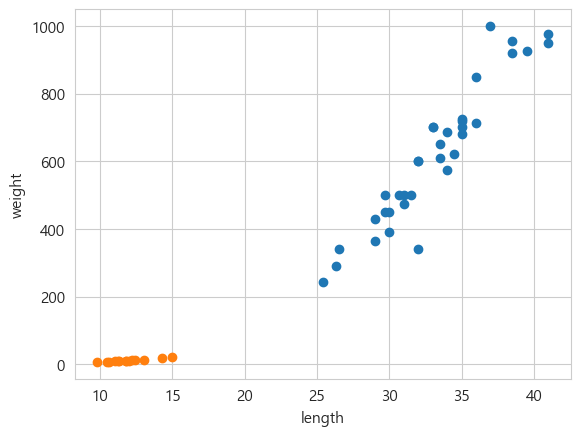

In [49]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight);
plt.xlabel('length')
plt.ylabel('weight');

In [51]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight
fish_data = [[l,w] for l,w in zip(length, weight)]

y = [1]*35 + [0]*14

knc = KNeighborsClassifier()
knc.fit(fish_data, y)
knc.predict([[38.5, 920.0]]), knc.predict_proba([[38.5, 920.0]])

(array([1]), array([[0., 1.]]))

In [53]:
knc.predict([[20.1, 100.2]])

array([0])

In [64]:
knc.predict([[25.1, 176.2]])

array([0])

In [79]:
X = np.array(fish_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
len(X_train), len(X_test), len(y_train), len(y_test)

(39, 10, 39, 10)

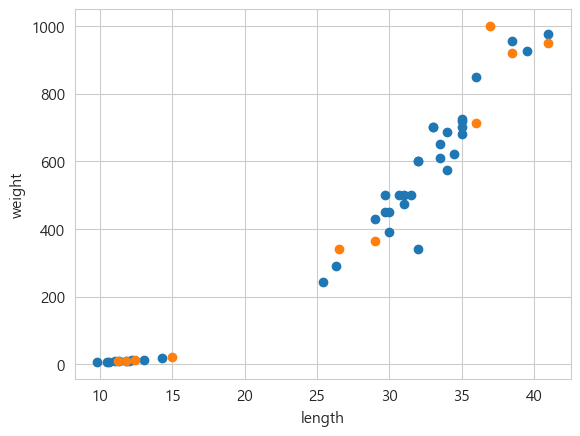

In [81]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.xlabel('length')
plt.ylabel('weight');

In [94]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
pred = knc.predict(X_test)
print(pred)
print(knc.score(X_test, y_test))
print(accuracy_score(y_test, pred))
print(mean_squared_error(y_test, pred))

[1 1 0 0 1 1 0 1 0 1]
1.0
1.0
0.0


# 60 quiz

In [96]:
iris = datasets.load_iris()
print(type(iris))
print(iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [100]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
target = iris.target
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=1)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(y_test, pred), mean_squared_error(y_test, pred))

0.9666666666666667 0.03333333333333333


# 농어

In [117]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]).reshape(-1, 1)


perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]).reshape(-1, 1)

In [118]:
print(len(perch_length), len(perch_weight))
print(perch_length.ndim, perch_weight.ndim)
print(perch_length.shape, perch_weight.shape)

56 56
2 2
(56, 1) (56, 1)


In [120]:
# 데이타프레임으로 변경 
df = pd.DataFrame(perch_length, columns=['perch_length'])
df['perch_weight'] = perch_weight
# df

In [121]:
# 훈련 데이타와 테스트 데이타로 분리 
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)

In [122]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [123]:
# 평가 
model_lr.score(X_test, y_test)

0.8247503123313558

In [124]:
print('MAE',mean_absolute_error(y_test, model_lr.predict(X_test)))
print('MSE',mean_squared_error(y_test, model_lr.predict(X_test)))
print('RMSE',np.sqrt(mean_squared_error(y_test, model_lr.predict(X_test))))
print('R2', r2_score(y_test, model_lr.predict(X_test)))

MAE 94.46122937985581
MSE 17590.265977889187
RMSE 132.6283000640858
R2 0.8247503123313558


In [125]:
model_lr.coef_

array([[39.01714496]])

In [126]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
print(ridge.score(X_train, y_train))

0.9398462422561089


In [127]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
print(lasso.score(X_train, y_train))

0.9398462276262135


> https://tensorflow.blog/2020/10/14/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%9D%98-load_boston-%ED%95%A8%EC%88%98%EA%B0%80-%EC%82%AD%EC%A0%9C%EB%90%A0-%EC%98%88%EC%A0%95%EC%9E%85%EB%8B%88%EB%8B%A4/

In [129]:
house = datasets.fetch_california_housing()
house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

https://didalsgur.tistory.com/entry/%EC%BA%98%EB%A6%AC%ED%8F%AC%EB%8B%88%EC%95%84-%EC%A3%BC%ED%83%9D-%EA%B0%80%EA%B2%A9-%EC%98%88%EC%B8%A1-Dataset-California-Housing-Prices-Kaggle

In [130]:
datasets.load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59